In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
import xarray as xr
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from matplotlib.transforms import ScaledTranslation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [170]:
file_dir = 'C:/Users/taiwoajayi/Documents/DPRR/2A.GPM.DPR.V9-20211125.20170823-S113024-E130256.019802.V07A.HDF5'
file_dir2 = 'C:/Users/taiwoajayi/Documents/DPRR/2A.GPM.GMI.GPROF2021v1.20170823-S113024-E130256.019802.V07A.HDF5'

In [171]:
f = h5py.File(file_dir, 'r')
f2 = h5py.File(file_dir2, 'r')

In [172]:
f

<HDF5 file "2A.GPM.DPR.V9-20211125.20170823-S113024-E130256.019802.V07A.HDF5" (mode r)>

In [28]:
day = np.array(f["FS"]['SLV']['precipRateNearSurface'])
len(day)

7933

In [21]:
day7 = np.array(f["FS"]['SLV']['precipRate'])
day7

array([[[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        ...,
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]],

       [[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        ...,
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. , -9999.9],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]],

       [[    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
    

In [27]:
dayyy = day7[:,:,158]
len(dayyy)

7933

In [22]:

day8 = np.array(f["FS"]['PRE']['height'])
day8

array([[[ 2.08090352e+04,  2.06901367e+04,  2.05712363e+04, ...,
          2.39357452e+02,  1.20457581e+02,  1.55770910e+00],
        [ 2.09348027e+04,  2.08153984e+04,  2.06959902e+04, ...,
          2.77496857e+02,  1.58090469e+02,  3.86840782e+01],
        [ 2.09360508e+04,  2.08161582e+04,  2.06962617e+04, ...,
          1.94190826e+02,  7.42956543e+01, -4.55994987e+01],
        ...,
        [ 2.09575957e+04,  2.08376309e+04,  2.07176641e+04, ...,
          2.03453278e+02,  8.34871368e+01, -3.64790001e+01],
        [ 2.09490762e+04,  2.08295996e+04,  2.07101191e+04, ...,
          2.79179260e+02,  1.59700073e+02,  4.02209015e+01],
        [ 2.08174258e+04,  2.06984531e+04,  2.05794785e+04, ...,
          2.34937393e+02,  1.15963463e+02, -3.01046634e+00]],

       [[ 2.08073262e+04,  2.06884277e+04,  2.05695273e+04, ...,
          2.37650986e+02,  1.18751129e+02, -1.48730934e-01],
        [ 2.09330879e+04,  2.08136816e+04,  2.06942754e+04, ...,
          2.75781677e+02,  1.56375275e

In [23]:
day8[0,0,158]

2022.8555

In [145]:

Lat = np.array(f["FS"]['Latitude'])
lon = np.array(f["FS"]['Longitude'])
lon.shape
lon

array([[176.5344 , 176.53392, 176.53355, ..., 176.6103 , 176.61397,
        176.6177 ],
       [176.64355, 176.64285, 176.64226, ..., 176.71068, 176.71416,
        176.71771],
       [176.7528 , 176.75189, 176.75108, ..., 176.81105, 176.81435,
        176.81772],
       ...,
       [152.79794, 152.79813, 152.79842, ..., 152.90033, 152.90456,
        152.90886],
       [152.90726, 152.90723, 152.90729, ..., 153.00058, 153.00462,
        153.00873],
       [153.01651, 153.01625, 153.01608, ..., 153.10085, 153.10469,
        153.10861]], dtype=float32)

In [176]:

Lat2 = np.array(f2["S1"]['Latitude'])
lon2 = np.array(f2["S1"]['Longitude'])
day77 = np.array(f2["S1"]['convectivePrecipitation'])
lon2.shape
lon2

array([[174.44876, 174.34294, 174.23734, ..., 173.55309, 173.6968 ,
        173.84125],
       [174.68925, 174.58356, 174.47806, ..., 173.88655, 174.03053,
        174.17523],
       [174.92896, 174.82335, 174.71794, ..., 174.21925, 174.3635 ,
        174.50845],
       ...,
       [150.17416, 150.0681 , 149.96223, ..., 148.9416 , 149.08427,
        149.22774],
       [150.41426, 150.30826, 150.20247, ..., 149.27332, 149.41629,
        149.56003],
       [150.65347, 150.54755, 150.44183, ..., 149.60724, 149.7505 ,
        149.89455]], dtype=float32)

In [47]:
height =  np.array(f["FS"]['PRE']['heightStormTop'])

In [56]:
'''highest_value_index = np.unravel_index(np.argmax(height), height.shape)

print("Index of the highest value:", highest_value_index)'''

Index of the highest value: (2270, 31)


In [58]:
# Find the indices of the top five highest values in the 2D array
top_n_indices = np.argpartition(height.ravel(), -5)[-5:]
top_n_indices = top_n_indices[np.argsort(-height.ravel()[top_n_indices])]
top_n_indices = np.unravel_index(top_n_indices, height.shape)

print("Indices of the top five highest values:")
for index in zip(*top_n_indices):
    print(index)

Indices of the top five highest values:
(2270, 31)
(2448, 18)
(2449, 19)
(2257, 3)
(2555, 36)


In [147]:
tolerance = 1e-5  # Define a tolerance for equality
specific_lon = -93.6511
indexes = np.where(np.isclose(lon, specific_lon, atol=tolerance))

# Print the indexes
print("Indexes of lon approximately equal to -93.6511:", indexes)


Indexes of lon approximately equal to -93.6511: (array([2279, 2284, 2289, 2306, 2339, 2346, 2370, 2375, 2380], dtype=int64), array([ 4,  6,  8, 15, 29, 32, 42, 44, 46], dtype=int64))


In [55]:
'''# Set the number of top values you want to find
top_n = 5

# Use argsort to get the indices of the top n maximum values
top_n_indices = np.argpartition(height.flatten(), -top_n)[-top_n:]

# Sort the top n indices by their corresponding values in descending order
top_n_indices = top_n_indices[np.argsort(-height.flatten()[top_n_indices])]

print("The indices of the top", top_n, "highest values are:", top_n_indices)'''

The indices of the top 5 highest values are: [111261 119970 120020 110596 125231]


In [105]:
GPS = pd.DataFrame({'Latitude': Lat.flatten(), 'longitude': lon.flatten(), 'Precipitationrate': dayyy.flatten(), 'Precipnearsurface': day.flatten(), 'HeightStormTop': height.flatten()}) 
GPS
for key in GPS:
    GPS[key][GPS[key] == -9999.90] = -1
GPS

,Latitude,longitude,Precipitationrate,Precipnearsurface,HeightStormTop
0,-66.275383,176.534393,0.0,0.0,-1.0
1,-66.224823,176.533920,0.0,0.0,-1.0
2,-66.174316,176.533554,0.0,0.0,-1.0
3,-66.124481,176.533310,0.0,0.0,-1.0
4,-66.075111,176.533188,0.0,0.0,-1.0
...,...,...,...,...,...
388712,-64.190987,153.093475,0.0,0.0,-1.0
388713,-64.141609,153.097122,0.0,0.0,-1.0
388714,-64.092056,153.100845,0.0,0.0,-1.0
388715,-64.041443,153.104691,0.0,0.0,-1.0


In [177]:
GPS2 = pd.DataFrame({'Latitude': Lat2.flatten(), 'longitude': lon2.flatten(), 'Precipitationrate': day77.flatten()}) 
GPS2
for key in GPS2:
    GPS2[key][GPS2[key] == -9999.90] = -1
GPS2

,Latitude,longitude,Precipitationrate
0,-60.836349,174.448761,-1.0
1,-60.847900,174.342941,-1.0
2,-60.859993,174.237335,-1.0
3,-60.872623,174.131958,-1.0
4,-60.885792,174.026825,-1.0
...,...,...,...
654376,-69.299652,149.323105,-1.0
654377,-69.317551,149.464752,-1.0
654378,-69.334732,149.607239,-1.0
654379,-69.351196,149.750504,-1.0


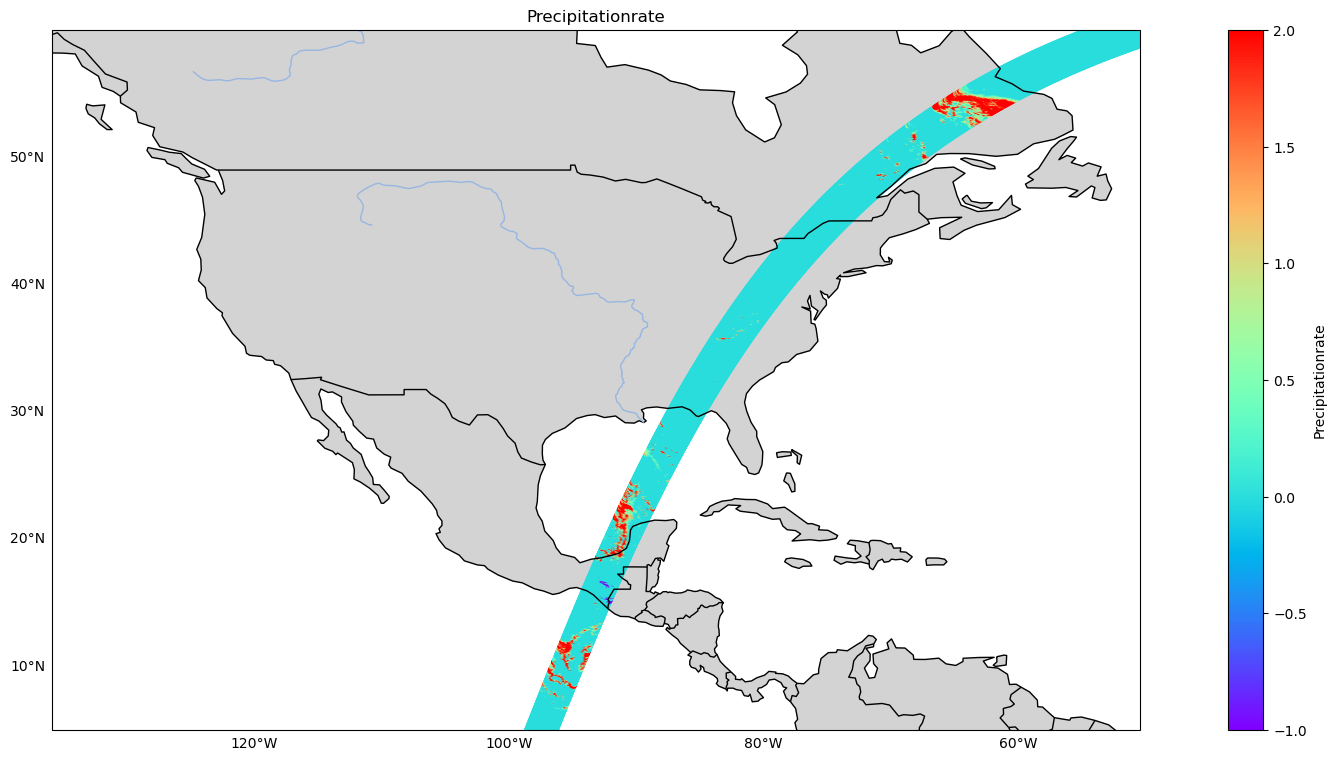

In [106]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(GPS['longitude'], GPS['Latitude'], c=GPS['Precipitationrate'], cmap='rainbow', s=5, transform=ccrs.PlateCarree(),vmax=2)
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Precipitationrate')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Precipitationrate')

# Show the map
plt.show()

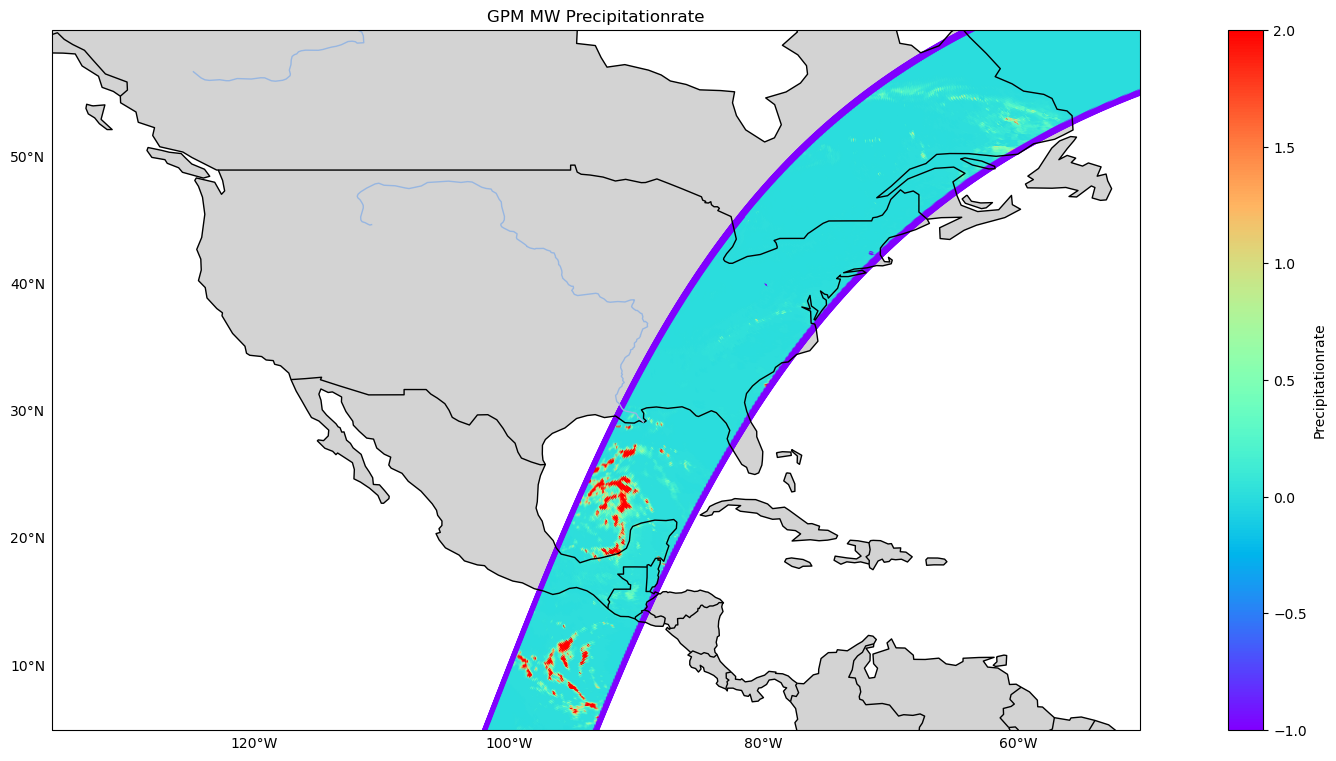

In [179]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(GPS2['longitude'], GPS2['Latitude'], c=GPS2['Precipitationrate'], cmap='rainbow', s=5, transform=ccrs.PlateCarree(),vmax=2)
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Precipitationrate')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('GPM MW Precipitationrate')

# Show the map
plt.show()

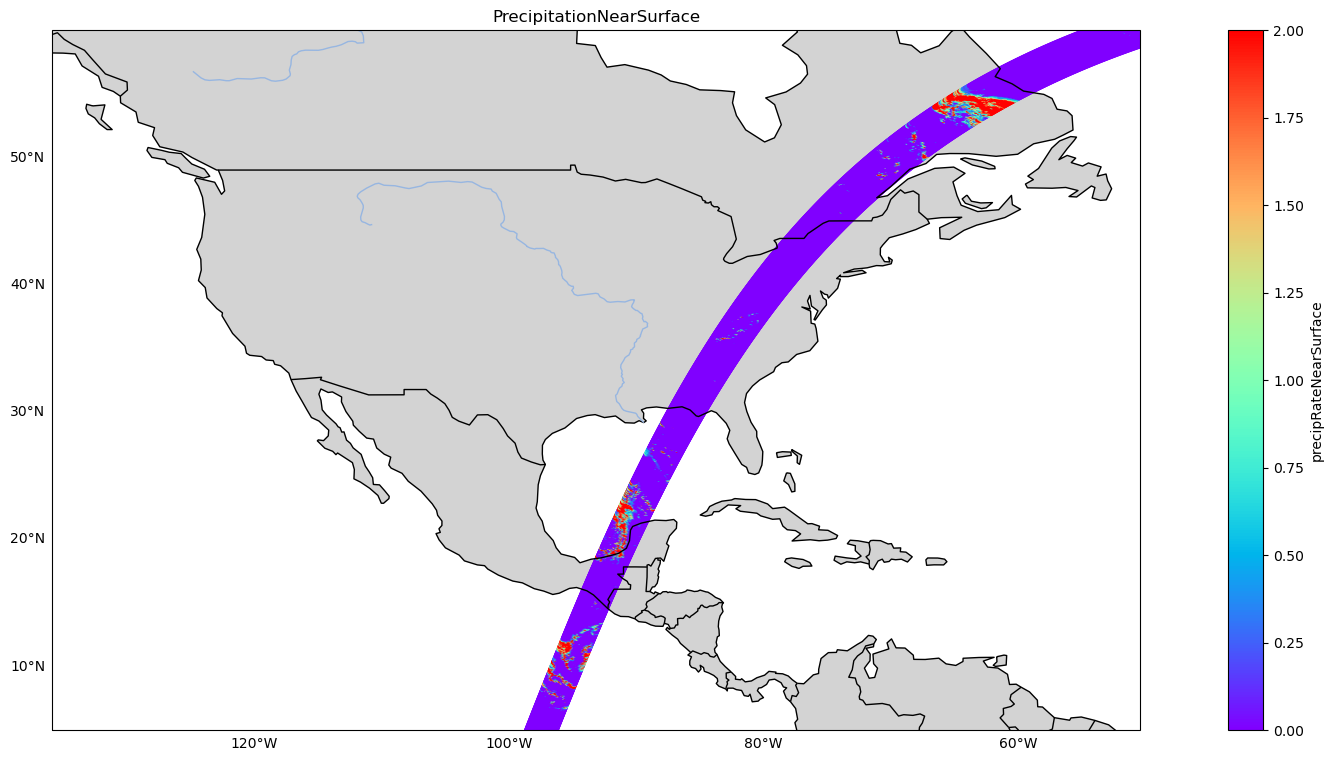

In [107]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(GPS['longitude'], GPS['Latitude'], c=GPS['Precipnearsurface'], cmap='rainbow', s=5, transform=ccrs.PlateCarree(),vmax=2)
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('precipRateNearSurface')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('PrecipitationNearSurface')

# Show the map
plt.show()

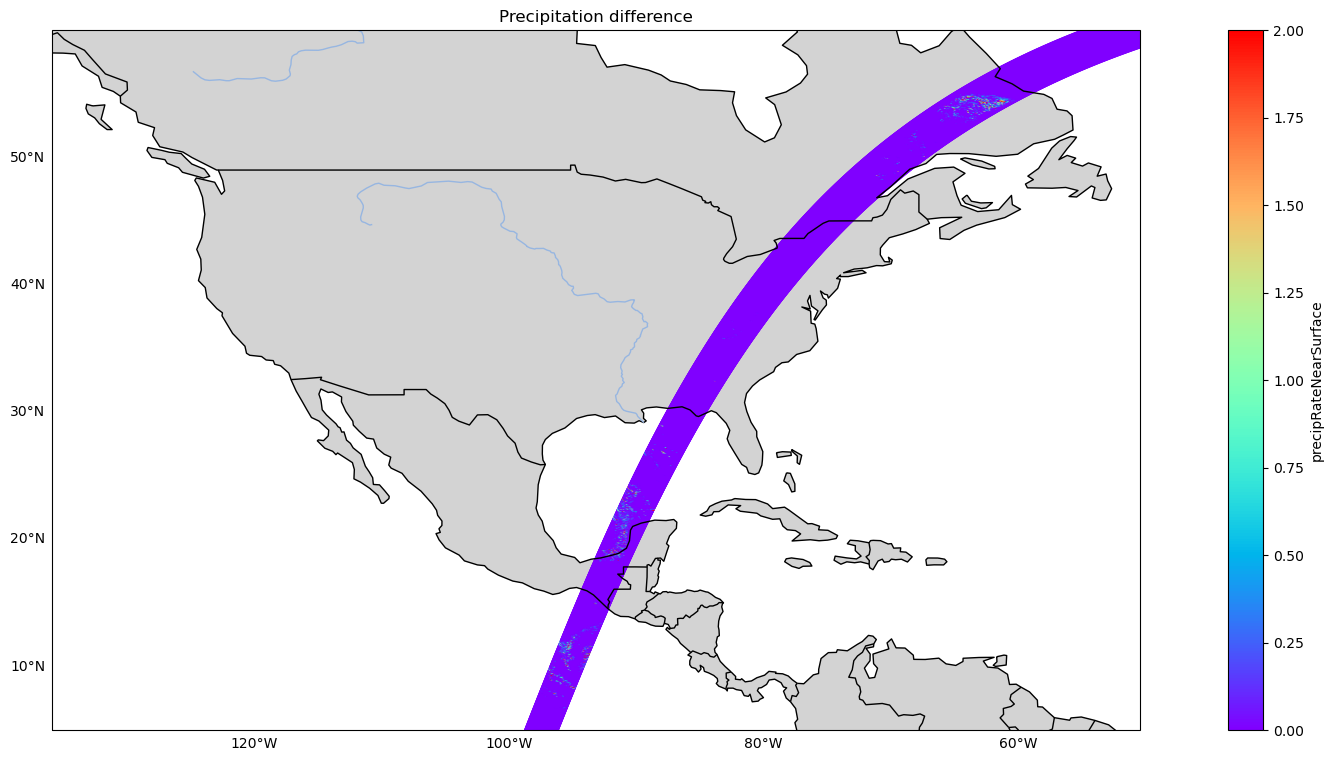

In [108]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(GPS['longitude'], GPS['Latitude'], c=GPS['Precipitationrate'] - GPS['Precipnearsurface'], cmap='rainbow', s=5, transform=ccrs.PlateCarree(),vmin = 0, vmax=2)
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('precipRateNearSurface')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Precipitation difference')

# Show the map
plt.show()

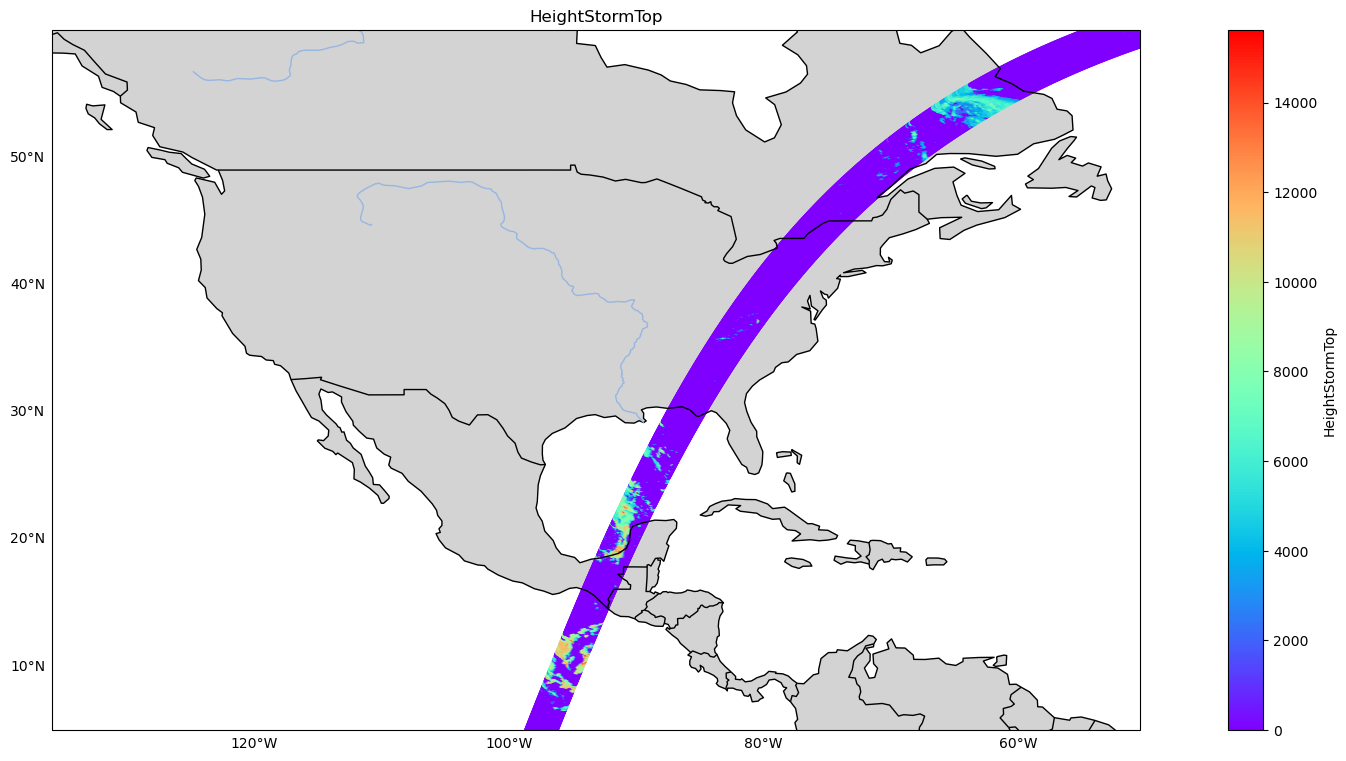

In [109]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-135.9, -50.4, 5, 60], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(GPS['longitude'], GPS['Latitude'], c=GPS['HeightStormTop'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('HeightStormTop')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('HeightStormTop')

# Show the map
plt.show()

In [110]:
zfactor = np.array(f["FS"]['SLV']['zFactorFinal'])

In [111]:
zfactor.shape

(7933, 49, 176, 2)

In [155]:
height[2279, 4]

-9999.9

In [159]:
z = zfactor[2448,:,:,0]
z[z == -9999.90] = -1
z

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [163]:
zz = zfactor[2279,:,:,0]
zz[zz == -9999.90] = -1
zz

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., 29.8 , 29.79, 29.78],
       ...,
       [-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ]], dtype=float32)

In [162]:
zzfactor = pd.DataFrame({'zfactor': z.flatten()}) 
zzfactor
for key in zzfactor:
    zzfactor[key][zzfactor[key] == -9999.90] = -1
zzfactor


,zfactor
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
8619,-1.0
8620,-1.0
8621,-1.0
8622,-1.0


In [ ]:
GPS['longitude']

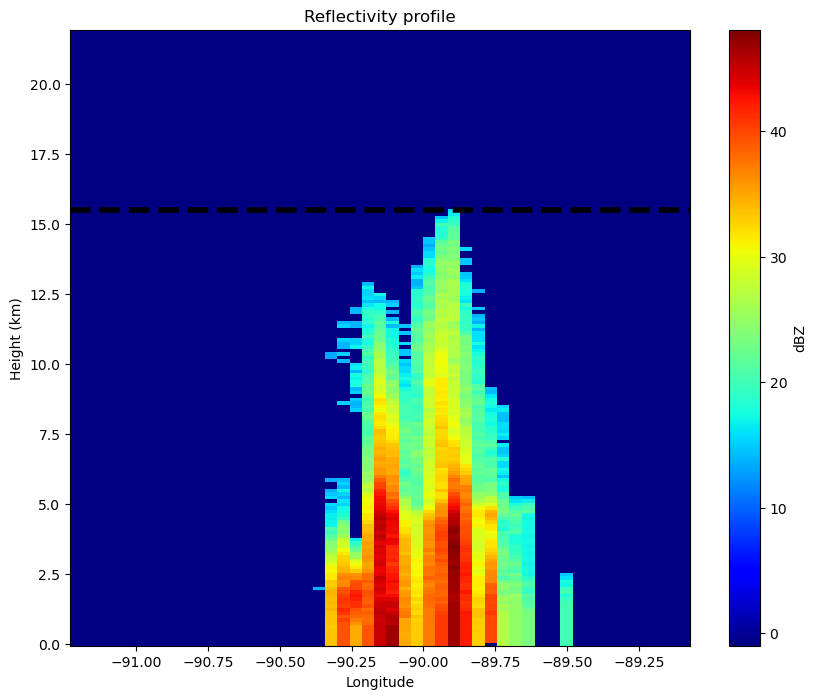

In [168]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.pcolor(lon[2518,:],np.arange(0,22,0.125),z.T[::-1], cmap='jet') # 'jet' is a commonly used colormap for radar data, but you can choose others

# Add dashed line at nbin 31
ax.axhline(15.5, color='black', linestyle='--', linewidth=4)

plt.colorbar(c, ax=ax, label="dBZ")

# Add titles and labels
#ax.set_title("zFactorFinal for Specific Index")
ax.set_xlabel("Longitude")
ax.set_ylabel("Height (km)")
ax.set_title('Reflectivity profile')

plt.show()


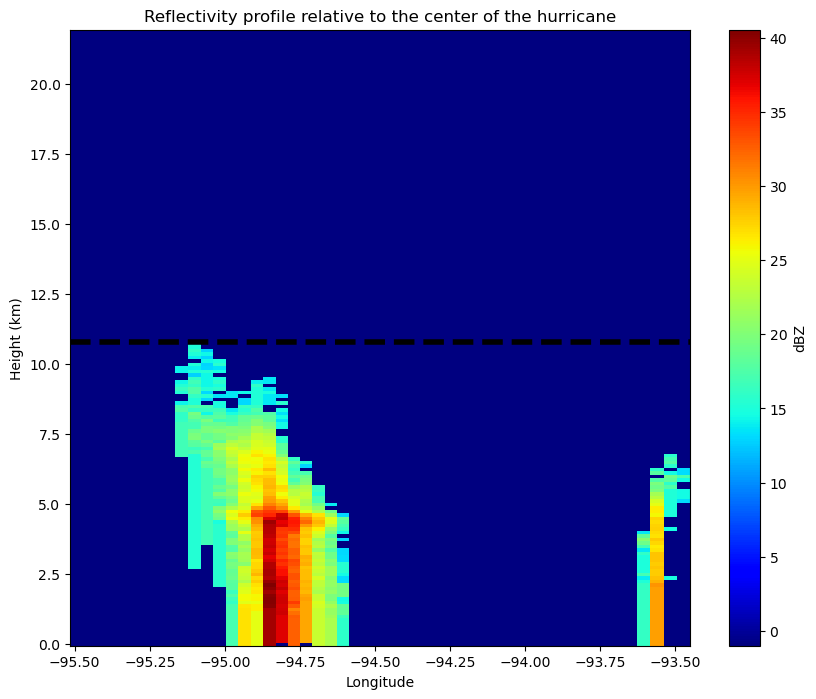

In [169]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.pcolor(lon[2279,:],np.arange(0,22,0.125),zz.T[::-1], cmap='jet') # 'jet' is a commonly used colormap for radar data, but you can choose others

# Add dashed line at nbin 31
ax.axhline(10.8, color='black', linestyle='--', linewidth=4)

plt.colorbar(c, ax=ax, label="dBZ")

# Add titles and labels
#ax.set_title("zFactorFinal for Specific Index")
ax.set_xlabel("Longitude")
ax.set_ylabel("Height (km)")
ax.set_title('Reflectivity profile relative to the center of the hurricane')
plt.show()


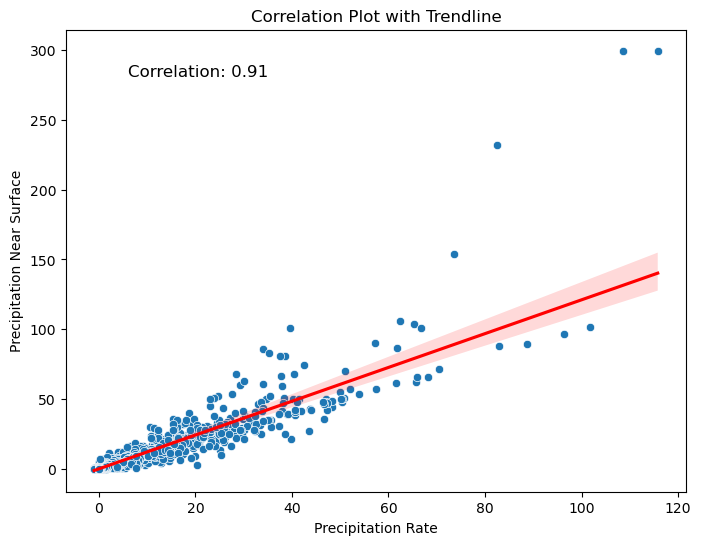

In [133]:

import seaborn as sns

# Create a scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Precipitationrate', y='Precipnearsurface', data=GPS)

# Calculate the correlation coefficient
correlation = np.corrcoef(GPS['Precipitationrate'], GPS['Precipnearsurface'])[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'

# Add the correlation coefficient as text on the plot
plt.annotate(correlation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

# Add a trendline
sns.regplot(x='Precipitationrate', y='Precipnearsurface', data=GPS, scatter=False, color='red')

# Set plot labels and title
plt.xlabel('Precipitation Rate')
plt.ylabel('Precipitation Near Surface')
plt.title('Correlation Plot with Trendline')

plt.show()


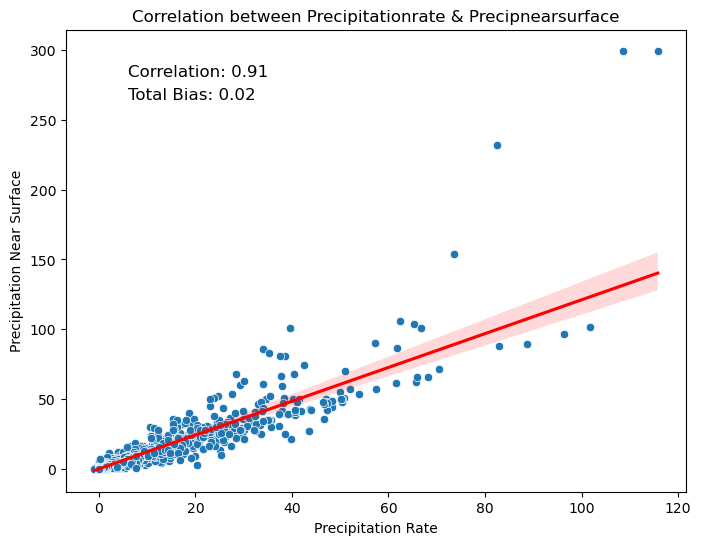

In [180]:

# Create a scatter plot with a trendline
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Precipitationrate', y='Precipnearsurface', data=GPS)

# Calculate the correlation coefficient
correlation = np.corrcoef(GPS['Precipitationrate'], GPS['Precipnearsurface'])[0, 1]
correlation_text = f'Correlation: {correlation:.2f}'

# Calculate the total bias
total_bias = GPS['Precipnearsurface'].mean() - GPS['Precipitationrate'].mean()
total_bias_text = f'Total Bias: {total_bias:.2f}'

# Add the correlation coefficient and total bias as text on the plot
plt.annotate(correlation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(total_bias_text, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)

# Add a trendline
sns.regplot(x='Precipitationrate', y='Precipnearsurface', data=GPS, scatter=False, color='red')

# Set plot labels and title
plt.xlabel('Precipitation Rate')
plt.ylabel('Precipitation Near Surface')
plt.title('Correlation between Precipitationrate & Precipnearsurface')

plt.show()
